C:\Users\User\AppData\Local\Temp\ipykernel_16760\1553542648.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  loans_income = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/loans_income.csv",squeeze=True)


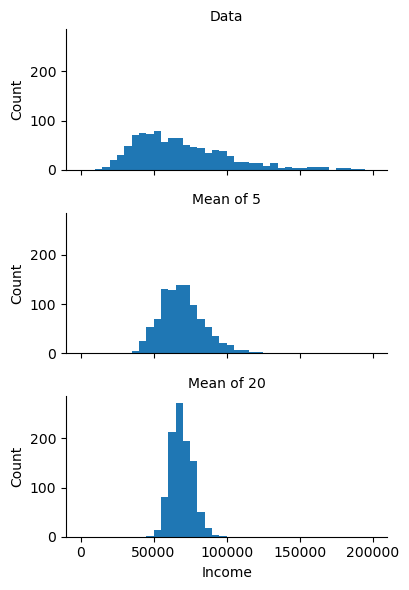

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loans_income = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/loans_income.csv",squeeze=True)

sample_data = pd.DataFrame({
    'income' :  loans_income.sample(1000),
    'type': 'Data'
})
sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _ in range(1000)],
    'type' : 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)],
    'type' : 'Mean of 20'
})
results = pd.concat([sample_data,sample_mean_05, sample_mean_20])

g = sns.FacetGrid(results, col = 'type', col_wrap = 1, height = 2, aspect = 2)
g.map(plt.hist, 'income', range=[0, 200000], bins =40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')


In [5]:
from sklearn.utils import resample
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loans_income = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/loans_income.csv",squeeze=True)

results = []

for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

C:\Users\User\AppData\Local\Temp\ipykernel_16760\2247254446.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  loans_income = pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/loans_income.csv",squeeze=True)


Bootstrap Statistics:
original: 62000.0
bias: -83.60100000000239
std. error: 230.7777115562744


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

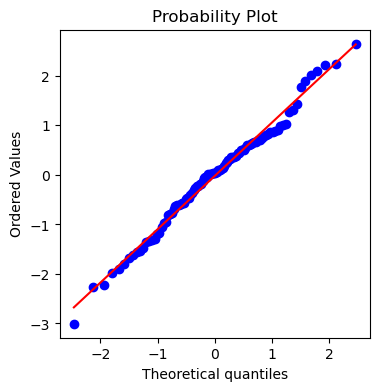

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(4,4))

# QQ그림 그리기 p. 92
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample,plot=ax)

((array([-3.33278964, -3.07756454, -2.93575124, ...,  2.93575124,
          3.07756454,  3.33278964]),
  array([-6.60529819, -6.09667121, -5.40220961, ...,  5.12547859,
          5.87072271,  6.03787   ])),
 (1.4823778663727092, 0.0015561067366313861, 0.9941828221936322))

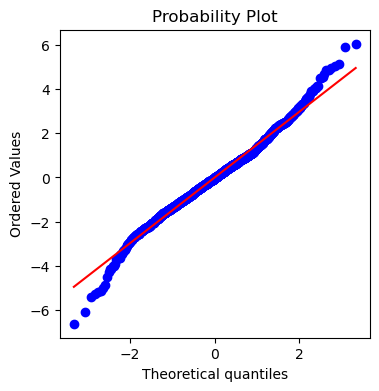

In [7]:
import pandas as pd
import numpy as np
sp500= pd.read_csv("C:/Users/User/Desktop/project/statistics data/data/sp500_data.csv.gz")


# QQ 그림 p. 94
nflx = sp500.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig,ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx,plot=ax)

## 이항분포 p. 100

In [9]:
import scipy.stats as stats

stats.binom.pmf(2, n = 5, p = 0.1)
stats.binom.cdf(2, n = 5, p = 0.1)

0.99144

## 푸아송 분포 p. 104

In [10]:
import scipy.stats as stats

stats.poisson.rvs(2, size = 100)

array([2, 1, 3, 1, 1, 1, 3, 5, 2, 3, 0, 2, 3, 3, 1, 1, 4, 3, 1, 1, 2, 2,
       1, 1, 6, 3, 2, 1, 1, 2, 3, 1, 1, 3, 1, 2, 3, 1, 3, 0, 1, 1, 3, 1,
       4, 1, 1, 1, 1, 3, 1, 1, 2, 0, 3, 4, 1, 1, 0, 2, 1, 1, 2, 5, 1, 6,
       2, 2, 1, 2, 2, 3, 2, 2, 1, 1, 2, 2, 4, 4, 1, 2, 1, 1, 0, 0, 4, 1,
       4, 3, 0, 2, 3, 2, 1, 2, 3, 1, 2, 2], dtype=int64)

## 지수분포 p. 105

In [11]:
import scipy.stats as stats

stats.expon.rvs(scale = 1/0.2, size = 100)
stats.expon.rvs(scale = 5, size = 100)

array([6.33934632e+00, 7.04674114e+00, 3.23952486e-01, 2.65520281e+00,
       1.89608993e+00, 6.05389413e+00, 1.22258991e+00, 1.67586887e+00,
       5.69450030e+00, 4.62427874e+00, 2.71631415e+00, 8.64143924e+00,
       5.62153017e-01, 2.47777594e+00, 2.21854839e+00, 5.36470682e+00,
       8.49304433e+00, 6.85561687e-01, 1.16678904e+01, 1.77475409e+00,
       3.26583005e+00, 2.06477397e+00, 1.29773942e-01, 1.09499352e+00,
       1.16056117e+00, 4.14159328e+00, 7.99193723e-02, 1.05143559e+01,
       2.11138858e+00, 8.91425280e+00, 3.08675714e+00, 7.65305169e+00,
       2.37719795e+00, 1.69562223e+00, 4.98929557e-01, 5.07221238e+00,
       7.15875150e+00, 1.40272081e+00, 6.80320549e+00, 4.21889238e+00,
       8.47032390e+00, 8.80336546e+00, 5.87681869e+00, 6.80056688e+00,
       7.25625037e+00, 6.03798176e-01, 1.26966729e+01, 2.66020993e+00,
       1.78910156e+00, 5.76949884e+00, 6.36053551e+00, 5.55909135e+00,
       2.02189695e+00, 1.44914168e+01, 5.32821901e-01, 1.15717689e+00,
      

## 베이불 분포 p. 106

In [13]:
import scipy.stats as stats

stats.weibull_min.rvs(1.5, scale = 5000, size = 100)

array([ 7544.37846629,  7407.54772465, 10068.99476519,  4736.95913945,
        3319.98116833,  5304.87618848,  1189.06174983,  4596.25601373,
        5202.9298494 ,  7600.34467256,  1716.62851712,  1769.16592461,
        5775.91404585, 13777.42048148,  5089.85382906,  2925.25465447,
        2604.20419083,  2917.06968286,  2068.23907733,  6819.40717021,
        3729.86590939,  9627.76341318,  2655.6001662 ,  3837.14302041,
        3248.17625242,  3716.76084992,   196.56187136,  1665.46636107,
        4730.11779153,  2915.78853652,  1449.5812946 ,  1617.36610966,
        1853.90304143,  2270.6078521 ,  1301.68824968,  8505.33658447,
        9359.78299594,  6727.47410842,  2198.00083042,  1745.3905789 ,
        4082.3522119 ,  1069.5150469 ,  5563.64946976,  3252.09394816,
        6442.15362351,  2948.70293538,  4616.32273877,  3448.17024146,
        4227.84896761,  6580.5084383 ,  2914.49968026,  1393.34079327,
        3517.8916561 ,  4225.07644333,  4239.87498567,  2317.9668215 ,
      